In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter)
from dataclasses import dataclass

In [2]:
SEED_VALUE = 42

random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)
tf.random.set_seed(SEED_VALUE)

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)
print(X_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


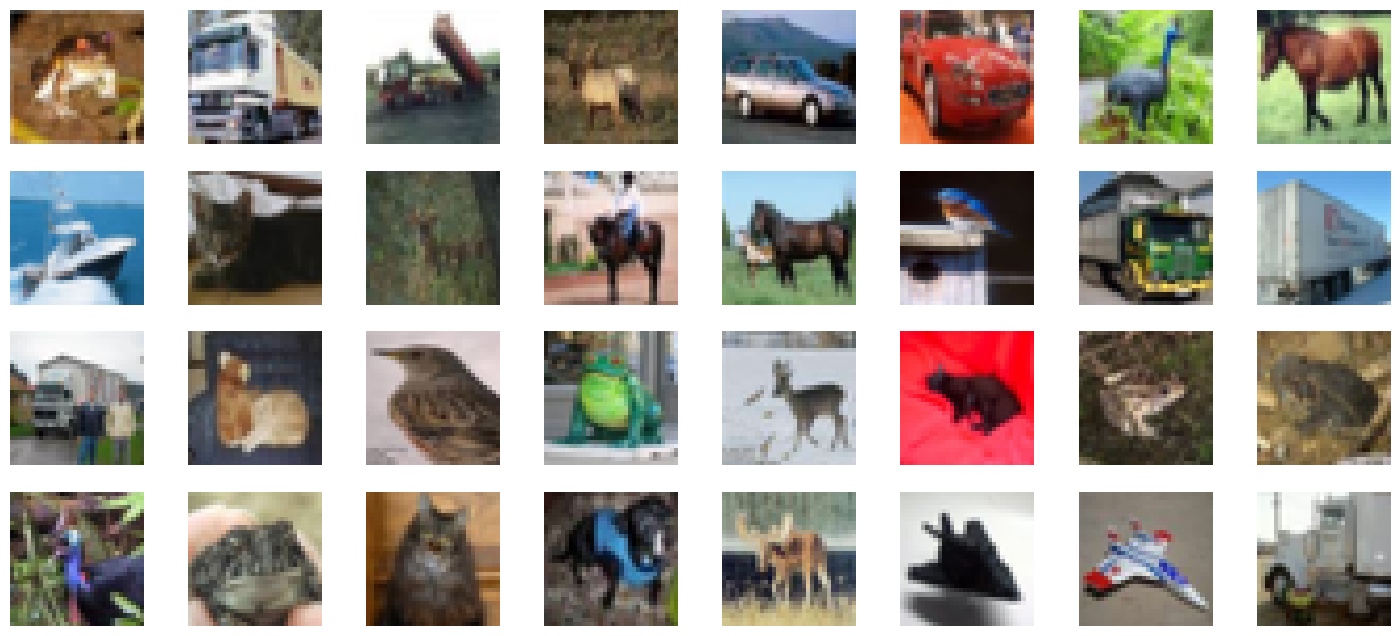

In [7]:
plt.figure(figsize=(18, 8))

num_rows = 4
num_cols = 8

# plot images in the batch
for i in range(num_rows * num_cols):
    ax = plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(X_train[i, :, :])
    plt.axis("off")

In [8]:
X_train = X_train.astype("float32") / 255
X_test  = X_test.astype("float32")  / 255

print('Original (integer) label for the first training sample: ', y_train[0])

y_train = to_categorical(y_train)
y_test  = to_categorical(y_test)

print('After conversion to categorical one-hot encoded labels: ', y_train[0])

Original (integer) label for the first training sample:  [6]
After conversion to categorical one-hot encoded labels:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [9]:
@dataclass(frozen=True)
class DatasetConfig:
    NUM_CLASSES: int = 10
    IMG_HEIGHT: int = 32
    IMG_WIDTH: int = 32
    NUM_CHANNELS: int = 3


@dataclass(frozen=True)
class TrainingConfig:
    EPOCHS: int = 31
    BATCH_SIZE: int = 256
    LEARNING_RATE: float = 0.001

In [17]:
def cnn_model(input_shape=(32, 32, 3)):
    model = Sequential()

    # Conv Block 1
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 2
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Conv Block 3
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    return model

In [18]:
model = cnn_model()
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 669,354 (2.55 MB)

 Trainable params: 669,354 (2.55 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

In [20]:
history = model.fit(X_train,
                    y_train,
                    batch_size=TrainingConfig.BATCH_SIZE, 
                    epochs=TrainingConfig.EPOCHS, 
                    verbose=1, 
                    validation_split=.3,
                   )

Epoch 1/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 77s 558ms/step - accuracy: 0.1564 - loss: 2.2413 - val_accuracy: 0.1847 - val_loss: 2.3555
Epoch 2/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 91s 664ms/step - accuracy: 0.3035 - loss: 1.9114 - val_accuracy: 0.2761 - val_loss: 2.0518
Epoch 3/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 77s 562ms/step - accuracy: 0.3848 - loss: 1.6973 - val_accuracy: 0.4415 - val_loss: 1.5309
Epoch 4/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 75s 551ms/step - accuracy: 0.4400 - loss: 1.5289 - val_accuracy: 0.4693 - val_loss: 1.4376
Epoch 5/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 75s 547ms/step - accuracy: 0.4892 - loss: 1.4120 - val_accuracy: 0.5267 - val_loss: 1.3219
Epoch 6/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 81s 595ms/step - accuracy: 0.5336 - loss: 1.2936 - val_accuracy: 0.5709 - val_loss: 1.2220
Epoch 7/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 77s 561ms/step - accuracy: 0.5772 - loss: 1.1914 - val_accuracy: 0.5963 - val_loss: 1.1346
Epoch 8/31
137/137 ━━━━━━━━━━━━━━━━━━━━ 83s 606ms/step - accuracy: 0.5968 - loss: 1

In [21]:
def plot_results(metrics, title=None, ylabel=None, ylim=None, metric_name=None, color=None):
    fig, ax = plt.subplots(figsize=(15, 4))

    if not (isinstance(metric_name, list) or isinstance(metric_name, tuple)):
        metrics = [metrics,]
        metric_name = [metric_name,]

    for idx, metric in enumerate(metrics):
        ax.plot(metric, color=color[idx])

    plt.xlabel("Epoch")
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlim([0, TrainingConfig.EPOCHS - 1])
    plt.ylim(ylim)
    
    ax.xaxis.set_major_locator(MultipleLocator(5))
    ax.xaxis.set_major_formatter(FormatStrFormatter("%d"))
    ax.xaxis.set_minor_locator(MultipleLocator(1))
    plt.grid(True)
    plt.legend(metric_name)
    plt.show()
    plt.close()

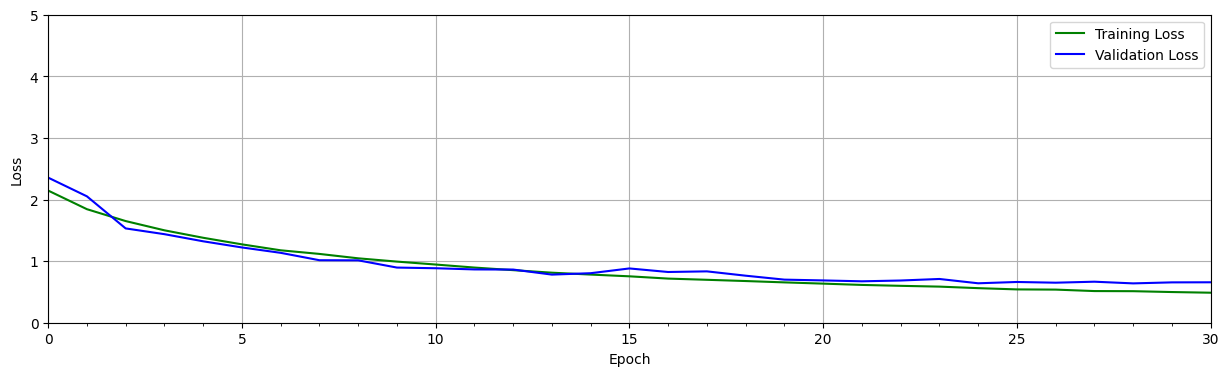

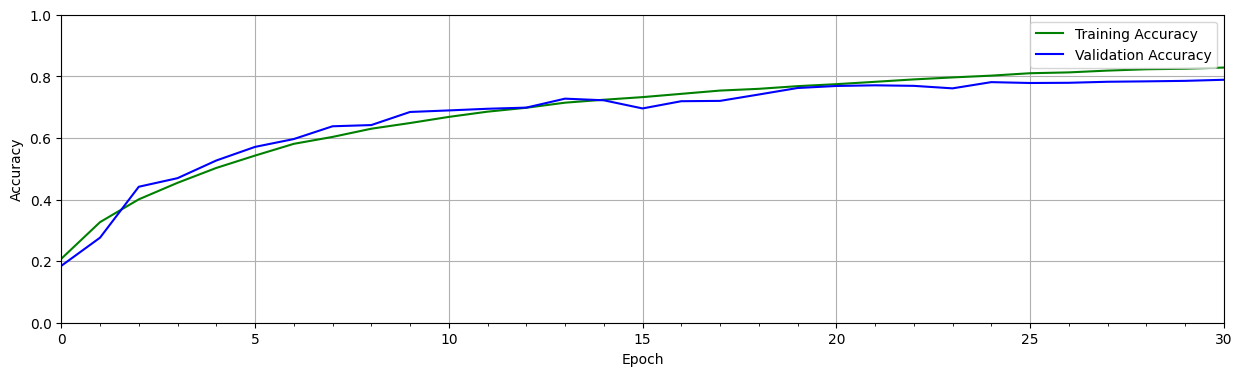

In [22]:
train_loss = history.history["loss"]
train_acc  = history.history["accuracy"]
valid_loss = history.history["val_loss"]
valid_acc  = history.history["val_accuracy"]

plot_results(
    [train_loss, valid_loss],
    ylabel="Loss",
    ylim=[0.0, 5.0],
    metric_name=["Training Loss", "Validation Loss"],
    color=["g", "b"],
)

plot_results(
    [train_acc, valid_acc],
    ylabel="Accuracy",
    ylim=[0.0, 1.0],
    metric_name=["Training Accuracy", "Validation Accuracy"],
    color=["g", "b"],
)

In [23]:
# 1.Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc*100:.3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step - accuracy: 0.7811 - loss: 0.6684
Test accuracy: 77.990


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Prediction accuracy:  0.77


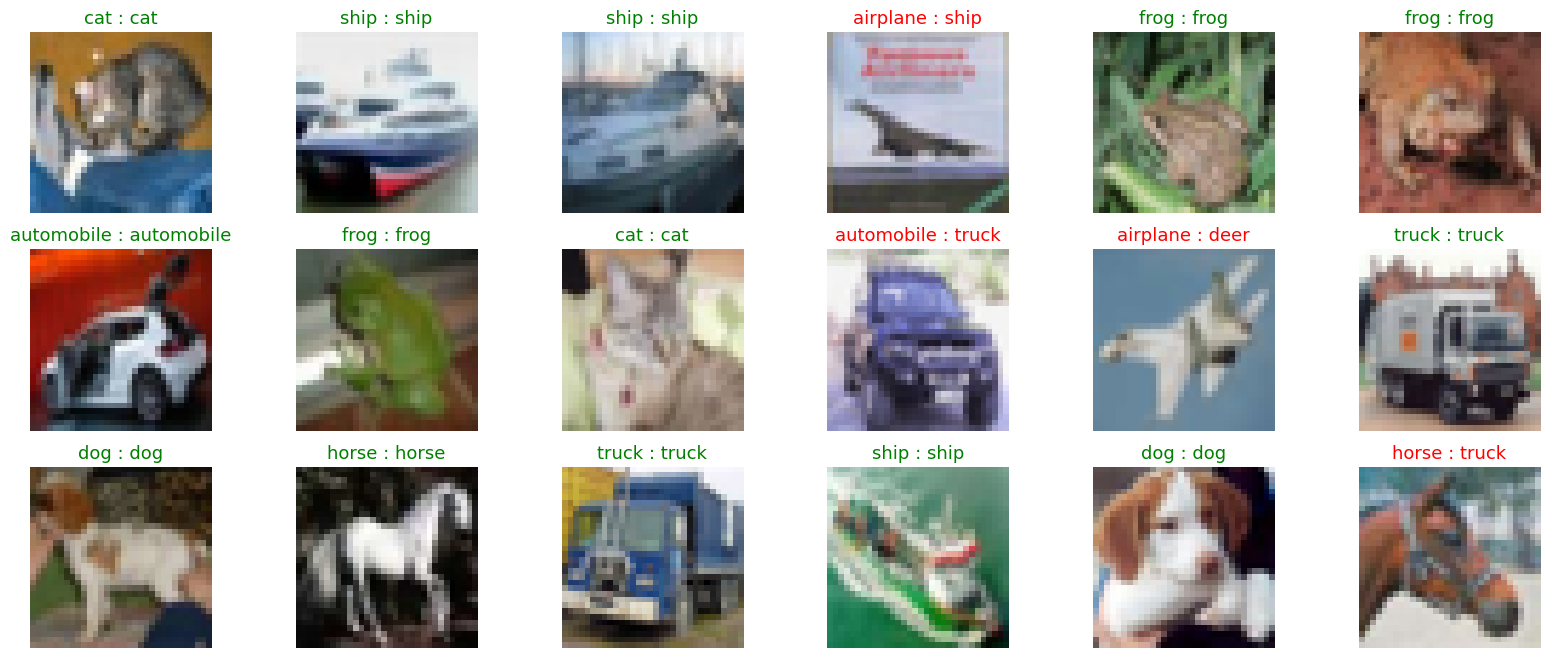

In [24]:
# 2.Make predictions on sample test images
def evaluate_model(dataset, model):
    class_names = [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
    num_rows = 3
    num_cols = 6

    data_batch = dataset[0 : num_rows * num_cols]

    predictions = model.predict(data_batch)

    plt.figure(figsize=(20, 8))
    num_matches = 0

    for idx in range(num_rows * num_cols):
        ax = plt.subplot(num_rows, num_cols, idx + 1)
        plt.axis("off")
        plt.imshow(data_batch[idx])

        pred_idx = tf.argmax(predictions[idx]).numpy()
        truth_idx = np.nonzero(y_test[idx])

        title = str(class_names[truth_idx[0][0]]) + " : " + str(class_names[pred_idx])
        title_obj = plt.title(title, fontdict={"fontsize": 13})

        if pred_idx == truth_idx:
            num_matches += 1
            plt.setp(title_obj, color="g")
        else:
            plt.setp(title_obj, color="r")

        acc = num_matches / (idx + 1)
    print("Prediction accuracy: ", int(100 * acc) / 100)

    return

evaluate_model(X_test, model)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


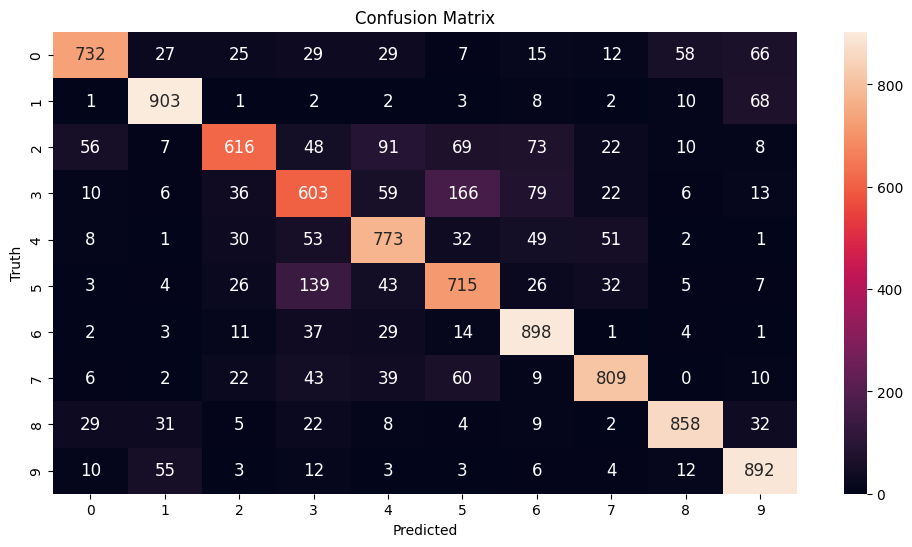

In [26]:
# 3.Confusion Matrix
predictions = model.predict(X_test)
predicted_labels = [np.argmax(i) for i in predictions]
y_test_integer_labels = tf.argmax(y_test, axis=1)

cm = tf.math.confusion_matrix(labels=y_test_integer_labels, predictions=predicted_labels)

plt.figure(figsize=[12, 6])
import seaborn as sn

sn.heatmap(cm, annot=True, fmt="d", annot_kws={"size": 12})
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.show()